In [1]:
import numpy as np
import os
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image
from tensorflow.keras.utils import img_to_array, load_img, array_to_img

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

2023-09-26 20:04:23.169124: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 20:04:23.194991: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 20:04:23.195889: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 20:04:23.689227: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### 1 - define data augmentation

In [2]:
image_size = (64, 64)  # Adjust the desired image size
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,       # Scale pixel values to [0, 1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)


### 2- create train, test, val dataset

In [5]:
training_set = train_datagen.flow_from_directory(
    'path/to/dataset/images/Train',         # Path to the training data directory
    target_size=image_size,  # Resize images to the specified size
    batch_size=batch_size,
    class_mode='categorical',  # Use 'categorical' for multi-class classification
    shuffle=True              # Shuffle the data
)

validation_set = test_datagen.flow_from_directory(
    'path/to/dataset/images/Val',           # Path to the validation data directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False             # Do not shuffle the validation data
)

test_set = test_datagen.flow_from_directory(
    'path/to/dataset/images/Test',           # Path to the test data directory
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False             # Do not shuffle the test data
)


Found 176 images belonging to 4 classes.
Found 87 images belonging to 4 classes.
Found 28 images belonging to 4 classes.


### *Label*        *Index*

#### J.Biden  ==> 0
#### P.Biya  ==> 1
#### P.Kagame  ==> 2
#### E.Macron ==> 3


### 3- Create CNN model 

In [38]:
model = Sequential()

# Convolution + Pooling Layer
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening
model.add(Flatten())

# Full connection
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### model's parameters

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 64)        1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 128)       

### 4- train the model 

In [43]:
history = model.fit(training_set,
                batch_size=32,
                epochs=100,
                validation_data=validation_set,
                )

Epoch 1/100
1/6 [====>.........................] - ETA: 0s - loss: 0.5093 - accuracy: 0.8438

2023-09-26 21:10:30.321100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 1s 115ms/step - loss: 0.4323 - accuracy: 0.8466 - val_loss: 0.2541 - val_accuracy: 0.9080
Epoch 2/100


2023-09-26 21:10:30.945103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


6/6 [==============================] - 1s 105ms/step - loss: 0.3706 - accuracy: 0.8693 - val_loss: 0.2804 - val_accuracy: 0.8966
Epoch 3/100
6/6 [==============================] - 1s 107ms/step - loss: 0.3125 - accuracy: 0.8977 - val_loss: 0.4927 - val_accuracy: 0.8276
Epoch 4/100
6/6 [==============================] - 1s 112ms/step - loss: 0.3706 - accuracy: 0.8466 - val_loss: 0.3254 - val_accuracy: 0.8621
Epoch 5/100
6/6 [==============================] - 1s 108ms/step - loss: 0.3690 - accuracy: 0.8580 - val_loss: 0.2788 - val_accuracy: 0.9080
Epoch 6/100
6/6 [==============================] - 1s 94ms/step - loss: 0.3637 - accuracy: 0.8693 - val_loss: 0.3883 - val_accuracy: 0.8506
Epoch 7/100
6/6 [==============================] - 1s 120ms/step - loss: 0.3596 - accuracy: 0.8750 - val_loss: 0.2712 - val_accuracy: 0.8966
Epoch 8/100
6/6 [==============================] - 1s 101ms/step - loss: 0.4961 - accuracy: 0.8295 - val_loss: 0.5056 - val_accuracy: 0.8276
Epoch 9/100
6/6 [=========

### plot train/val loss and accuracy curves

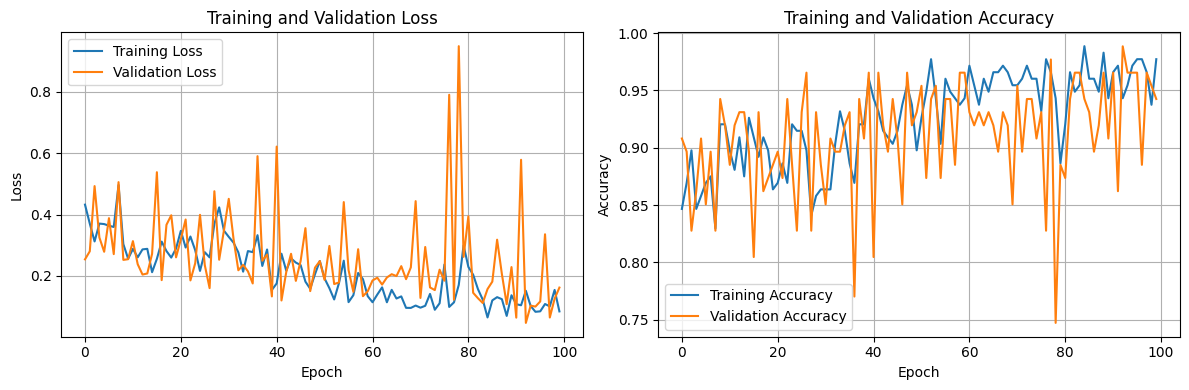

In [44]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have a 'history' object
# history = model.fit(...)

# Plot the training loss and validation loss
plt.figure(figsize=(12, 4))  # Adjust the figure size as needed

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

# Customize the plot for loss
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Customize the plot for accuracy
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()  # Ensures proper spacing between subplots
plt.show()


### 5- evaluate the model 

In [45]:
test_loss, test_accuracy = model.evaluate(test_set)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")


1/1 [==============================] - 0s 56ms/step - loss: 0.0743 - accuracy: 0.9643
Test loss: 0.0743, Test accuracy: 0.9643


2023-09-26 21:12:07.061207: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


### 6- make predictions 

In [46]:
y_pred = model.predict(test_set)  # X_test contains your test images


1/1 [==============================] - 0s 96ms/step


2023-09-26 21:18:10.972367: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


In [47]:
y_pred_labels = np.argmax(y_pred, axis=1)  # Assuming one-hot encoding of labels

In [48]:
y_pred_labels ## index

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3])

In [49]:
len(y_pred_labels)

28

### 7- save model

In [ ]:
model.save('models/presidents.h5')